In [1]:
dataset_path = 'Downloads/dataset/w/RealWaste'


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 50

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.3,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 3808 images belonging to 9 classes.


In [10]:
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 949 images belonging to 9 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


from sklearn.utils import class_weight
import numpy as np

# 🧮 Compute class weights
labels = train_generator.classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights = dict(enumerate(class_weights))


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
     class_weight=class_weights
)


/home/deepak/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 47s 384ms/step - accuracy: 0.1980 - loss: 2.1002 - val_accuracy: 0.3562 - val_loss: 1.7769
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 44s 373ms/step - accuracy: 0.4166 - loss: 1.5857 - val_accuracy: 0.3593 - val_loss: 1.8935
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 45s 374ms/step - accuracy: 0.4758 - loss: 1.3874 - val_accuracy: 0.4067 - val_loss: 1.6604
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 44s 372ms/step - accuracy: 0.5394 - loss: 1.2275 - val_accuracy: 0.4352 - val_loss: 1.6514
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 45s 374ms/step - accuracy: 0.5515 - loss: 1.1799 - val_accuracy: 0.4278 - val_loss: 1.7058
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 362ms/step - accuracy: 0.5809 - loss: 1.0931 - val_accuracy: 0.4415 - val_loss: 1.7720
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 44s 366ms/step - accuracy: 0.5690 - loss: 1.1186 - val_accuracy: 0.4763 - val_loss: 1.6347
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 365ms/step - accuracy: 0.6225 - loss: 1

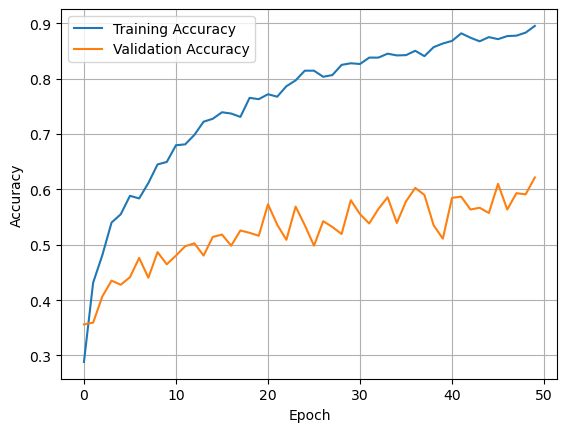

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import os

# Check your current working directory
print(f"📂 Current working directory: {os.getcwd()}")

# Create a 'models' folder if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model
model.save('models/waste_classifier_model.h5')
print("✅ Model saved successfully in the 'models' folder!")


📂 Current working directory: /home/deepak
✅ Model saved successfully in the 'models' folder!


In [16]:
#model.save('/content/drive/MyDrive/Project/waste_classifier_model.h5')
#print("✅ Model saved successfully!")


In [17]:
import tensorflow as tf

# Load the model from the local 'models' folder
model = tf.keras.models.load_model('models/waste_classifier_model.h5')
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [22]:
class_labels = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash',
                'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

In [63]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the image
img_path = 'Downloads/dataset/w/RealWaste/Vegetation/Vegetation_193.jpg'  # change if needed
img = image.load_img(img_path, target_size=(128, 128))  # ✅ use same size as training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # normalize

# Step 2: Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_class = class_labels[predicted_index]

print("🔢 Prediction Probabilities:")
for i, label in enumerate(class_labels):
    print(f"{label}: {prediction[0][i]*100:.2f}%")


print(f"🔍 Predicted Waste Type: {predicted_class}")

# Step 3: Show eco-friendly suggestion
eco_tips = {
    'Plastic': 'Use reusable cloth or paper bags instead of plastic.',
    'Glass': 'Switch to steel or reusable bottles.',
    'Food Organics': 'Use compost bins to make fertilizer.',
    'Metal': 'Recycle metal items at local scrap centers.',
    'Cardboard': 'Reuse or recycle cardboard for packing.',
    'Paper': 'Minimize paper use; go digital!',
    'Textile Trash': 'Donate usable clothes; avoid fast fashion.',
    'Vegetation': 'Compost garden waste.',
    'Miscellaneous Trash': 'Avoid disposables; use durable alternatives.'
}

print(f"♻️ Eco Alternative Tip: {eco_tips[predicted_class]}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
🔢 Prediction Probabilities:
Cardboard: 0.00%
Food Organics: 0.00%
Glass: 0.00%
Metal: 0.00%
Miscellaneous Trash: 0.00%
Paper: 0.00%
Plastic: 0.00%
Textile Trash: 0.00%
Vegetation: 100.00%
🔍 Predicted Waste Type: Vegetation
♻️ Eco Alternative Tip: Compost garden waste.


In [64]:
# Step 4: Map to biodegradability, compostability, recyclability
waste_category_map = {
    'Plastic': ['Non-biodegradable', 'Recyclable'],
    'Glass': ['Non-biodegradable', 'Recyclable'],
    'Food Organics': ['Biodegradable', 'Compostable'],
    'Metal': ['Non-biodegradable', 'Recyclable'],
    'Cardboard': ['Biodegradable', 'Recyclable'],
    'Paper': ['Biodegradable', 'Recyclable'],
    'Textile Trash': ['Biodegradable'],  # assuming natural fibers
    'Vegetation': ['Biodegradable', 'Compostable'],
    'Miscellaneous Trash': ['Non-biodegradable']
}

waste_categories = waste_category_map.get(predicted_class, ['Unknown'])
print(f"\n🧾 Waste Category: {', '.join(waste_categories)}")

# Step 5: General waste handling tips
category_tips = {
    'Biodegradable': "You can compost this or let it naturally decompose.",
    'Non-biodegradable': "Avoid single-use items. Try to reuse or recycle.",
    'Compostable': "Put this in a compost bin or compost pile.",
    'Recyclable': "Place in a designated recycling bin."
}

print("\n📌 Waste Handling Tips:")
for cat in waste_categories:
    print(f"- {cat}: {category_tips.get(cat, 'No suggestion available.')}")



🧾 Waste Category: Biodegradable, Compostable

📌 Waste Handling Tips:
- Biodegradable: You can compost this or let it naturally decompose.
- Compostable: Put this in a compost bin or compost pile.


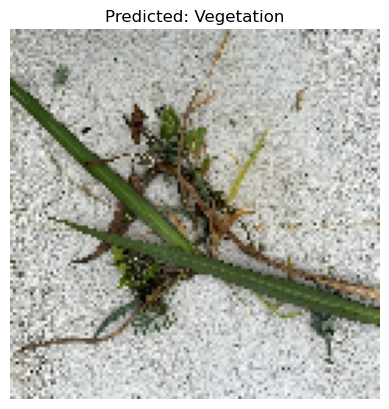

In [65]:
# Step 4: Display image
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()